In [ ]:
print("Lecture-15")

### Yapay Sinir Ağlarıyla Lojistik Olmayan Regresyon Örneği

Otomobillerin mil başına yaktıkları yakıtı tahmin edelim.

https://archive.ics.uci.edu/dataset/9/auto+mpg
https://www.kaggle.com/datasets/uciml/autompg-dataset

mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name

mpg --> aracın mil başına yaktığı yakıtın galon miktarı (1 galon 3.78 litredir)
cylinders --> Aracın silindir sayısı
displacement --> Aracın motor hacmi
horsepower --> aracın beygir gücü
weight --> aracın ağırlığı
acceleration --> aracın 100 km/h çıkma süresi (ivmelenmesi)
model year --> model yılı
origin --> Kategorik bir veri 1:USA, 2: Europe, 3: Japan
car name --> arabanın modeli

In [11]:
import pandas as pd
df = pd.read_csv("auto-mpg.data", header=None, sep=r'\s+', usecols=range(8))

print(df)

        0  1      2      3       4     5   6  7
0    18.0  8  307.0  130.0  3504.0  12.0  70  1
1    15.0  8  350.0  165.0  3693.0  11.5  70  1
2    18.0  8  318.0  150.0  3436.0  11.0  70  1
3    16.0  8  304.0  150.0  3433.0  12.0  70  1
4    17.0  8  302.0  140.0  3449.0  10.5  70  1
..    ... ..    ...    ...     ...   ...  .. ..
393  27.0  4  140.0  86.00  2790.0  15.6  82  1
394  44.0  4   97.0  52.00  2130.0  24.6  82  2
395  32.0  4  135.0  84.00  2295.0  11.6  82  1
396  28.0  4  120.0  79.00  2625.0  18.6  82  1
397  31.0  4  119.0  82.00  2720.0  19.4  82  1

[398 rows x 8 columns]


In [12]:
len(df)

398

In [13]:
(df.iloc[:, 3] == '?').sum()

6

In [ ]:
dataset_df = df[df.iloc[:, 3] != '?']

In [15]:
dataset_df

,0,1,2,3,4,5,6,7
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1
394,44.0,4,97.0,52.00,2130.0,24.6,82,2
395,32.0,4,135.0,84.00,2295.0,11.6,82,1
396,28.0,4,120.0,79.00,2625.0,18.6,82,1


In [16]:
(dataset_df.iloc[:, 3] == '?').sum()

0

In [17]:
import numpy as np

dataset = pd.get_dummies(dataset_df, columns=[7]).to_numpy(dtype=np.float32)

In [18]:
dataset

array([[ 18.,   8., 307., ...,   1.,   0.,   0.],
       [ 15.,   8., 350., ...,   1.,   0.,   0.],
       [ 18.,   8., 318., ...,   1.,   0.,   0.],
       ...,
       [ 32.,   4., 135., ...,   1.,   0.,   0.],
       [ 28.,   4., 120., ...,   1.,   0.,   0.],
       [ 31.,   4., 119., ...,   1.,   0.,   0.]], dtype=float32)

In [19]:
dataset_x = dataset[:, 1:]

In [20]:
dataset_x

array([[  8., 307., 130., ...,   1.,   0.,   0.],
       [  8., 350., 165., ...,   1.,   0.,   0.],
       [  8., 318., 150., ...,   1.,   0.,   0.],
       ...,
       [  4., 135.,  84., ...,   1.,   0.,   0.],
       [  4., 120.,  79., ...,   1.,   0.,   0.],
       [  4., 119.,  82., ...,   1.,   0.,   0.]], dtype=float32)

In [21]:
dataset_y = dataset[:, 0]

In [22]:
dataset_y

array([18. , 15. , 18. , 16. , 17. , 15. , 14. , 14. , 14. , 15. , 15. ,
       14. , 15. , 14. , 24. , 22. , 18. , 21. , 27. , 26. , 25. , 24. ,
       25. , 26. , 21. , 10. , 10. , 11. ,  9. , 27. , 28. , 25. , 19. ,
       16. , 17. , 19. , 18. , 14. , 14. , 14. , 14. , 12. , 13. , 13. ,
       18. , 22. , 19. , 18. , 23. , 28. , 30. , 30. , 31. , 35. , 27. ,
       26. , 24. , 25. , 23. , 20. , 21. , 13. , 14. , 15. , 14. , 17. ,
       11. , 13. , 12. , 13. , 19. , 15. , 13. , 13. , 14. , 18. , 22. ,
       21. , 26. , 22. , 28. , 23. , 28. , 27. , 13. , 14. , 13. , 14. ,
       15. , 12. , 13. , 13. , 14. , 13. , 12. , 13. , 18. , 16. , 18. ,
       18. , 23. , 26. , 11. , 12. , 13. , 12. , 18. , 20. , 21. , 22. ,
       18. , 19. , 21. , 26. , 15. , 16. , 29. , 24. , 20. , 19. , 15. ,
       24. , 20. , 11. , 20. , 19. , 15. , 31. , 26. , 32. , 25. , 16. ,
       16. , 18. , 16. , 13. , 14. , 14. , 14. , 29. , 26. , 26. , 31. ,
       32. , 28. , 24. , 26. , 24. , 26. , 31. , 19

In [23]:
from sklearn.model_selection import train_test_split

training_dataset_x, test_dataset_x, training_dataset_y, test_dataset_y = train_test_split(dataset_x, dataset_y, test_size=0.20)

In [24]:
# veri kümemizde sütunların mertebeleri arasında ciddi farklar vardır. Bunun için "özellik ölçeklendirmesi (feature scaling)"
# yapmamız gerekir. Min-Max Ölçeklemesini kullanalım.

from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(dataset_x)
scaled_training_dataset_x = mms.transform(training_dataset_x)
scaled_test_dataset_x = mms.transform(test_dataset_x)

In [25]:
scaled_training_dataset_x

array([[0.19999999, 0.07493539, 0.11413044, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.73126614, 0.58152175, ..., 1.        , 0.        ,
        0.        ],
       [0.6       , 0.49095607, 0.34782612, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.19999999, 0.22739018, 0.25      , ..., 1.        , 0.        ,
        0.        ],
       [0.19999999, 0.13953488, 0.18478262, ..., 1.        , 0.        ,
        0.        ],
       [0.19999999, 0.13436691, 0.22826087, ..., 0.        , 1.        ,
        0.        ]], dtype=float32)

In [26]:
scaled_test_dataset_x

array([[1.        , 0.73126614, 0.5543478 , 0.8630564 , 0.32738096,
        0.4166665 , 1.        , 0.        , 0.        ],
       [1.        , 0.8578811 , 0.56521744, 0.9594556 , 0.35714287,
        0.25      , 1.        , 0.        , 0.        ],
       [1.        , 0.49612403, 0.34782612, 0.49673945, 0.4464286 ,
        0.6666665 , 1.        , 0.        , 0.        ],
       [1.        , 0.8578811 , 1.        , 0.7555996 , 0.08928573,
        0.25      , 1.        , 0.        , 0.        ],
       [1.        , 0.64599484, 0.56521744, 0.81797564, 0.38690478,
        0.4166665 , 1.        , 0.        , 0.        ],
       [0.19999999, 0.07493539, 0.22826087, 0.1465835 , 0.38690478,
        0.08333349, 0.        , 0.        , 1.        ],
       [0.19999999, 0.04651162, 0.10326087, 0.11511201, 0.5       ,
        0.8333335 , 0.        , 0.        , 1.        ],
       [0.19999999, 0.09560724, 0.1521739 , 0.10405445, 0.43452382,
        1.        , 0.        , 1.        , 0.        ],


In [ ]:
# modelimizde 2 saklı katman olabilir. saklı katmanlar için aktivasyon fonksiyonlarını 'relu', çıktı katmanı için de "linear" alabilirz.
# Optimizer algoritması olarak "sgd", "adam", "rmsprop" herhangi birini seçebiliriz. rmsprop seçelim. Lojistik olmayan regresyon modellerinde
# loss fonksiyonunun genellikle "mse" ve metrik değerin de "mae" olarak kullanılır.

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential(name='AutoMPG')
model.add(Dense(64, input_dim=training_dataset_x.shape[1], activation='relu', name='Hidden-1'))
model.add(Dense(64, activation='relu', name='Hidden-2'))
model.add(Dense(1, activation='linear', name='Output'))

model.compile('rmsprop', loss='mse', metrics=['mae'])
model.summary()

In [ ]:
hist = model.fit(scaled_test_dataset_x, training_dataset_y, validation_split=0.2, batch_size=32, epochs=200)

In [ ]:
import matplotlib.pyplot as plt

figure = plt.gcf()
figure.set_size_inches((15, 5))
plt.title('Loss - Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(hist.epoch, hist.history['loss'])
plt.plot(hist.epoch, hist.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.show()

figure = plt.gcf()
figure.set_size_inches((15, 5))
plt.title('Binary Accuracy - Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Binary Accuracy')
plt.plot(hist.epoch, hist.history['binary_accuracy'])
plt.plot(hist.epoch, hist.history['val_binary_accuracy'])
plt.legend(['Binary Accuracy', 'Validation Binary Accuracy'])
plt.show()

In [ ]:
# loss: ...
# mae: ... -> bu değer gerçek değer ile tahmin edilen değer arasındaki ortalama sapmayı belirtmektedir. Yani 
# biz bir tahmin yaptığımızda tahmin ettiğiiz değer gerçek değerin ortalama mae değeri kadar uzağında olacaktır.
eval_result = model.evaluate(scaled_test_dataset_x, test_dataset_y)
for i in range(len(eval_result)):
    print(f'{model.metrics_names[i]}: {eval_result[i]}')

In [ ]:
#tahmin işlemini yapalım.
predict_data = np.array([4., 113., 95, 2228., 14., 71., 0, 0, 1], dtype='float32')
predict_data = mms.transform(predict_data)
predict_result = model.predict(predict_data)
print(predict_result)

In [ ]:
# birden fazla data'yı tahmin etme
predict_df = pd.read_csv('predict_data.csv', header=None)
predict_data = pd.get_dummies(predict_df, columns=[6]).to_numpy()

scaled_predict_data = mms.transform(predict_data)
predict_result = model.predict(scaled_predict_data)

for val in predict_result[:, 0]:
    print(val)

In [ ]:
model.save('auto-mpg.h5')

Modeli yükledikten sonra predict işlemi yapmadan önce bizim predict edilecek verileri feature scaling yapmamız gerekir. Halbuki bunun için oluşturmuş olduğumuz MinMaxScaler nesnesini biz bir yerde kaydetmedik. Sınıf nesnelerini içlerindeki verilerle diske bir dosya içerisinde saklayabiliriz. Bu işleme "nesnelerin seri hale getirilmesi" (object serialization) denilmektedir. pickle

import pickle

with open('autompg.pickle', 'wb') as f:
    pickle.dump(mms, f)

In [ ]:
from tensorflow.keras.models import load_model
import pickle

model = load_model('auto-mpg.h5')

with open('autompg.pickle', 'wb') as f:
    mms = pickle.load(f)

predict_data = np.array([[8,307,130,3504,12,70,0, 0, 1]], dtype='float32')
predict_data = mms.transform(predict_data)

predict_result = model.predict(predict_data)

---------------------------------------------------

In [42]:
import seaborn as sns

In [50]:
df = pd.read_csv('auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [51]:
df.shape

(398, 9)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [53]:
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [54]:
df['horsepower'] = df['horsepower'].replace('?', '0')
df['horsepower'] = df['horsepower'].astype('int')

In [55]:
df['horsepower'].unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160,  95,  97,
        85,  88,  46,  87,  90, 113, 200, 210, 193,   0, 100, 105, 175,
       153, 180, 110,  72,  86,  70,  76,  65,  69,  60,  80,  54, 208,
       155, 112,  92, 145, 137, 158, 167,  94, 107, 230,  49,  75,  91,
       122,  67,  83,  78,  52,  61,  93, 148, 129,  96,  71,  98, 115,
        53,  81,  79, 120, 152, 102, 108,  68,  58, 149,  89,  63,  48,
        66, 139, 103, 125, 133, 138, 135, 142,  77,  62, 132,  84,  64,
        74, 116,  82])

In [56]:
df = df.drop(columns='car name')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [57]:
sns.pairplot(df)
# https://seaborn.pydata.org/generated/seaborn.pairplot.html

AttributeError: module 'seaborn' has no attribute 'pairplot'

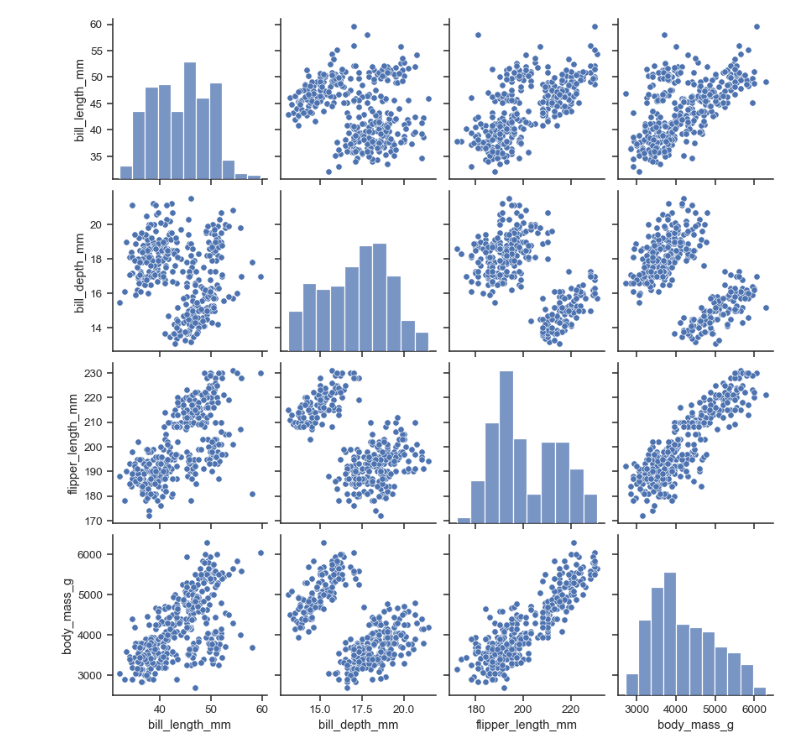

In [ ]:
origin = df.pop('origin')

In [60]:
origin

0      1
1      1
2      1
3      1
4      1
      ..
393    1
394    2
395    1
396    1
397    1
Name: origin, Length: 398, dtype: int64

In [62]:
df['UK'] = ( origin == 1 ) * 1

In [69]:
df['Europe'] = ( origin == 2 ) * 1

In [71]:
df['USA'] = ( origin == 3 ) * 1

In [73]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,UK,Europe,USA
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,0,0
394,44.0,4,97.0,52,2130,24.6,82,0,1,0
395,32.0,4,135.0,84,2295,11.6,82,1,0,0
396,28.0,4,120.0,79,2625,18.6,82,1,0,0


In [75]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,102.894472,40.269544,0.0,75.000,92.0,125.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
UK,398.0,0.625628,0.484569,0.0,0.000,1.0,1.000,1.0
Europe,398.0,0.175879,0.381197,0.0,0.000,0.0,0.000,1.0
USA,398.0,0.198492,0.399367,0.0,0.000,0.0,0.000,1.0


In [76]:
# ÖDEV: Bu tahminleme işlemini Lecture-14'te anlatılan regresyon modelleri için uygulayalım.